## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Data Understanding
The data we are using comes from the King County housing data set.

In order to better understand data represented in the columns we accessed the King County Assessor website at: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

## Setting up standard imports
The cell below imports standard libraries that will be used for both data exploration, cleaning, and modeling. 

In [1]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## Exploratory Data Analysis

Open csv file.

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
df.shape

(21597, 21)

Examined head of data, data types, and null values. 

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are 6 columns that contain object data types. If kept, these will need to be converted in order to apply linear regression models.  

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

View, waterfront, and year renovated all contain null values. We will inspect each individually in order to determine if these will be dropped or recategorized. 

In [7]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [8]:
#several of the rows contain null values, in order to preserve data
#we decided to recategorize null at "unknown"
df['waterfront'] = df['waterfront'].fillna('Unknown')
df['waterfront'].value_counts()


NO         19075
Unknown     2376
YES          146
Name: waterfront, dtype: int64

In [9]:
df['view'].value_counts()
#after reading the description of view and seeing the large number of houses with no view 
#we decided that it is not a relevant column and will be dropped from the dataframe 

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [10]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
# we assumed that 0 indicates that a house has not been renovated
# in order to keep the data we will change the nulls to 1 because 
# median value would change them all to 0 and the mean value was 83, which is not a real year

After reading on the King County assessor website we saw that sqft living included finished basements. So we looked into what data was included in this column.

In [13]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3260.0        1
556.0         1
207.0         1
792.0         1
518.0         1
Name: sqft_basement, Length: 304, dtype: int64

We saw that there is a '?' as a value. This was not explained and did not add to our knowledge so we decided to add a column that calculated the square footage of basement by subtracting total square footage from square footabge above ground. 

In [14]:
df['sqft_basement_calc'] = df['sqft_living'] - df['sqft_above']

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_calc
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Unknown,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


To better address what features can increase the value of a house we decided to drop the following numerical values that are used for data entry purposes only: 
- id
- date

For previously explained reasons we will be dropping the following columns as well: 
- sqft_basement
- view 

In [16]:
relevant_columns = [    
 'price',
 'bedrooms',    
 'bathrooms',  
 'sqft_living',  
 'sqft_lot',    
 'floors',    
 'waterfront', 
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_basement_calc',
]
df = df[relevant_columns]

Inspecting new dataframe with relevant columns only

In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_calc
0,221900.0,3,1.00,1180,5650,1.0,Unknown,Average,7 Average,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


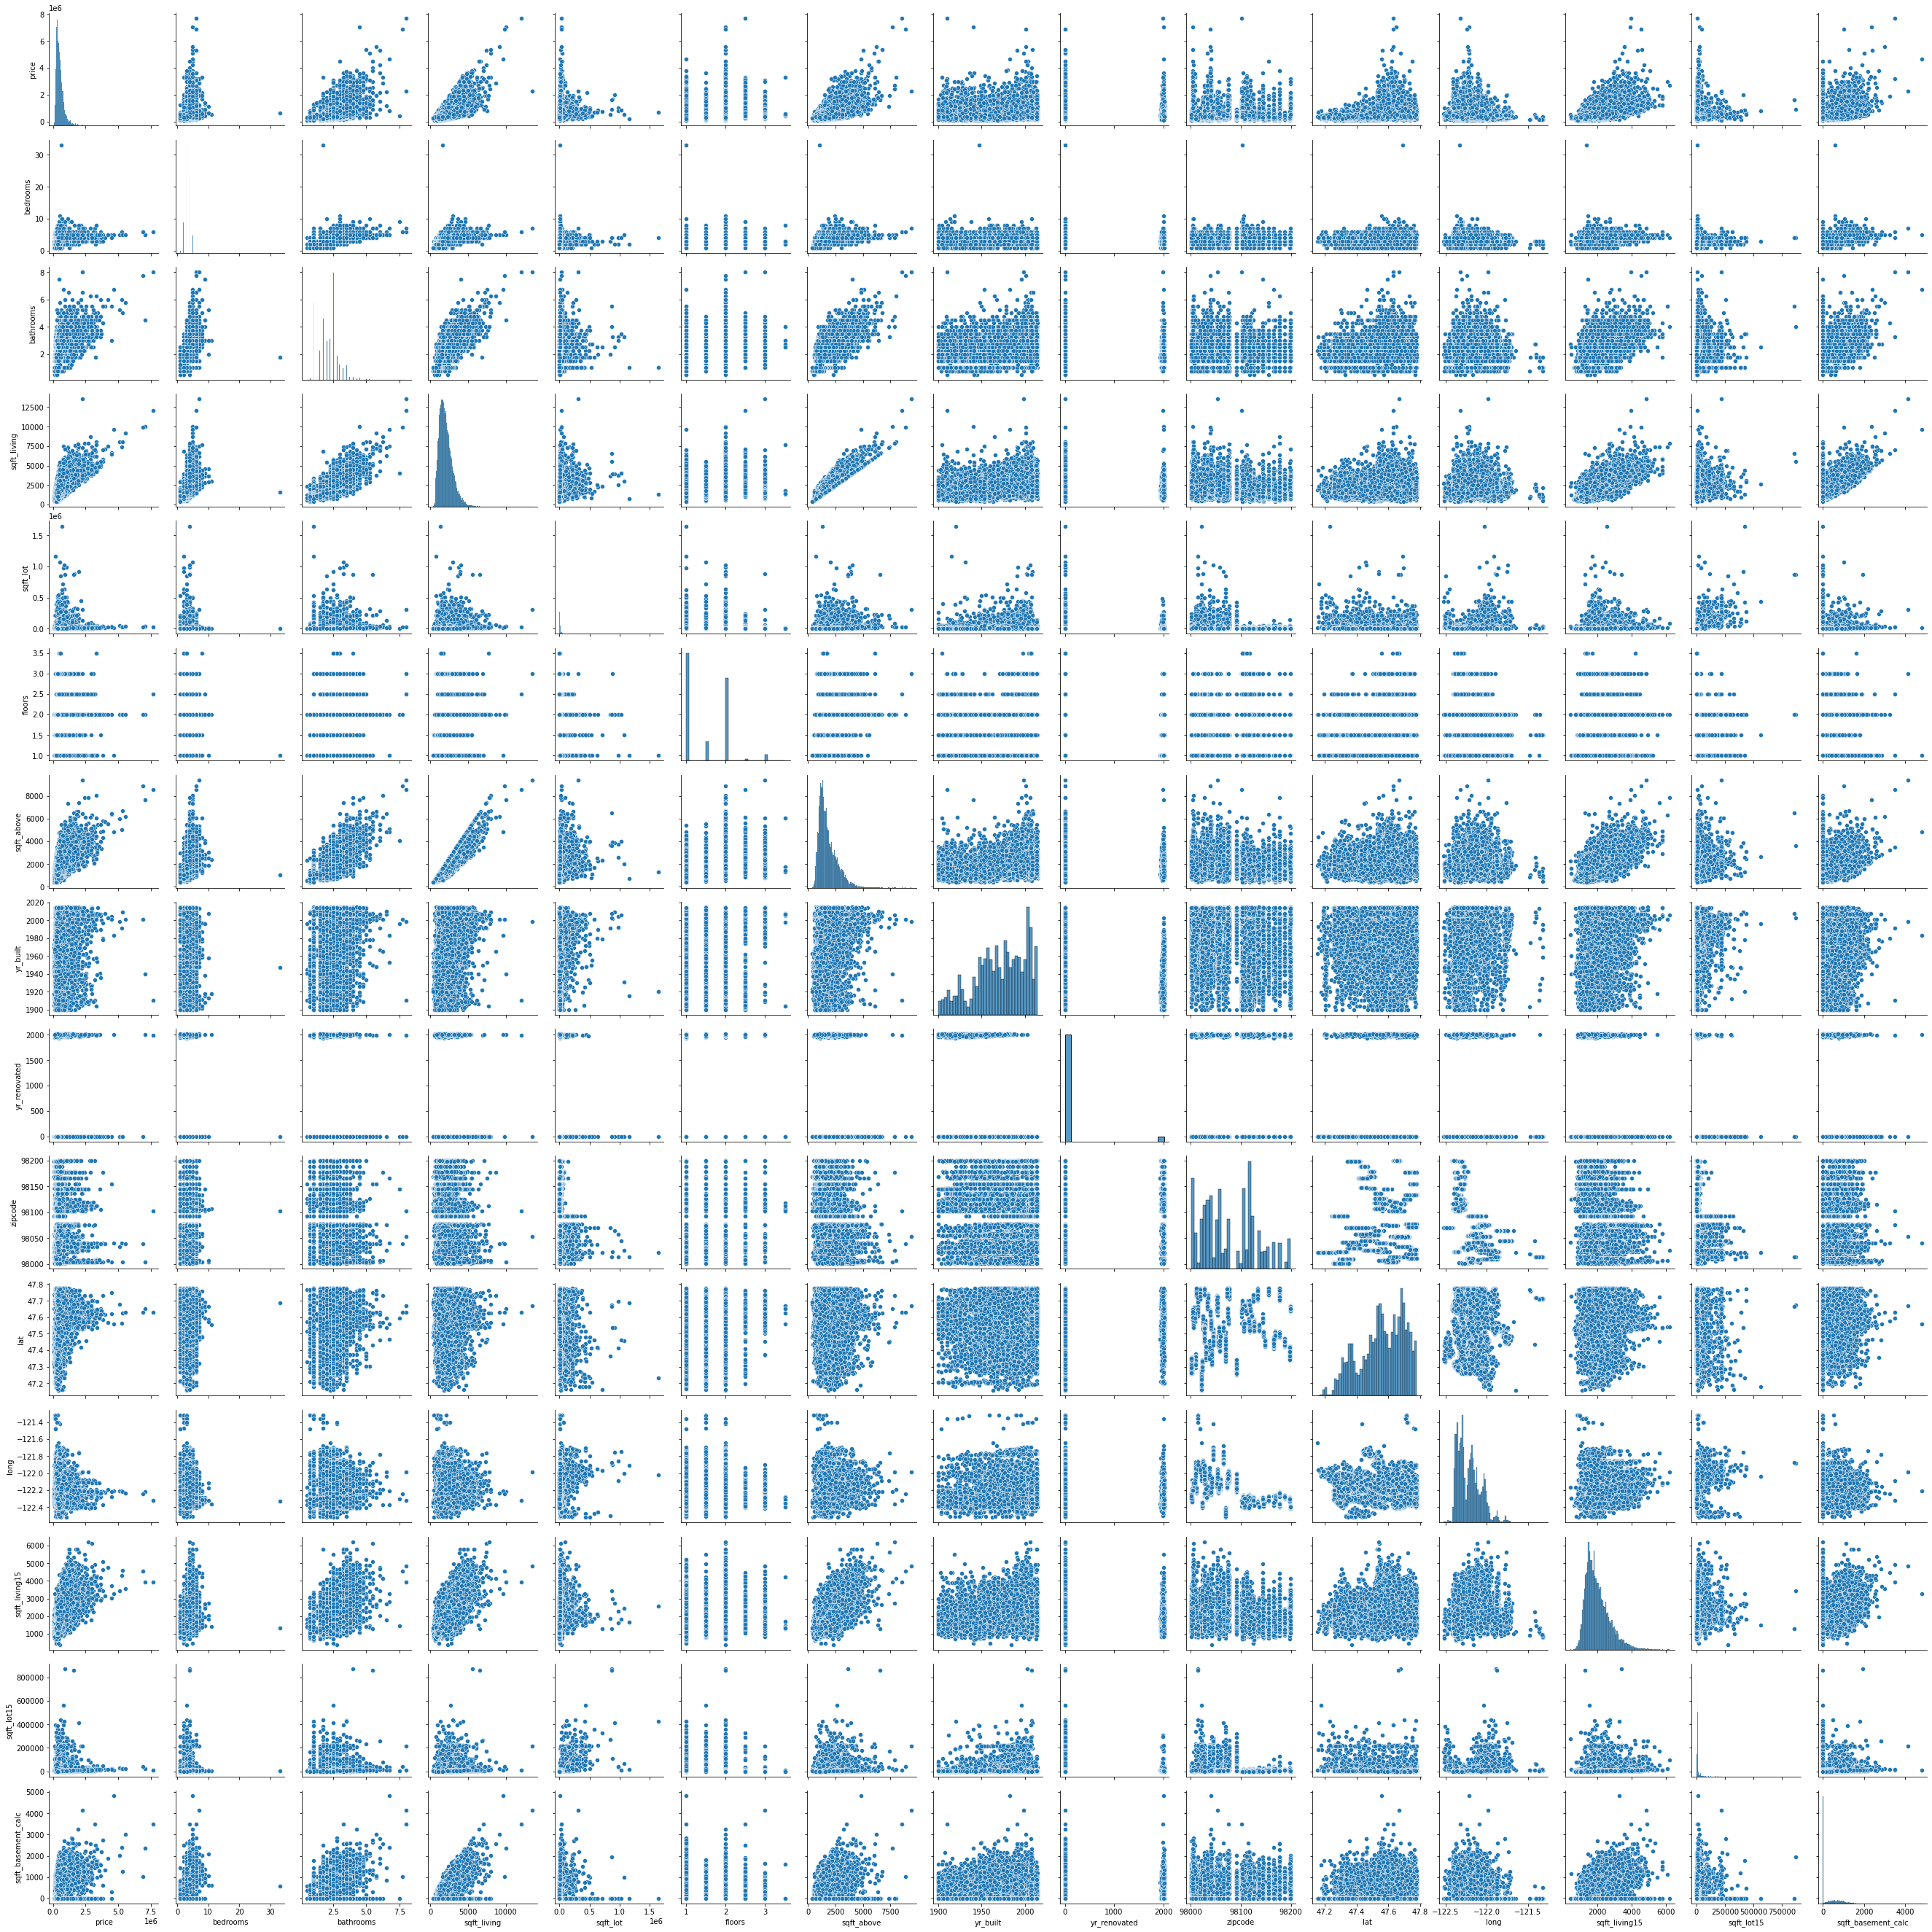

In [18]:
sns.pairplot(df)

In [19]:
# need to redo pair plot for smaller sections

Create correlation table. Beginning to look for related features for simple linear regression.

In [20]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_calc
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.323799
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.302808
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.283440
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,0.435130
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.015418
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.245715
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077,-0.052156
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777,-0.133064
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852,0.073832
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294,0.074725


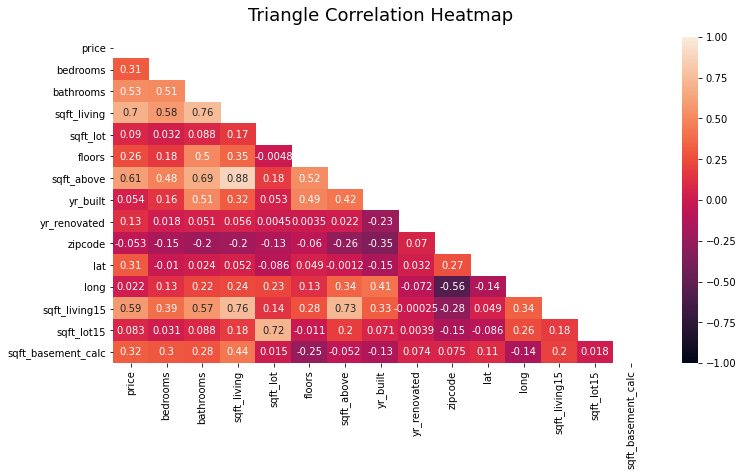

In [20]:
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot = True);
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

From the heat map it appears that sqft_living seems to have the highest correlation to price. It is also moderately and highly correlated to number bedrooms and bathrooms which could cause issues with multicollinearity. 

## Baseline Linear Regression 
### Price & Square Foot Living 

In [21]:
y = df['price']
x = df['sqft_living']

In [22]:
price_living_results = sm.OLS(y, sm.add_constant(x)).fit()

In [23]:
price_living_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:33:50   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model only explains 49% of variance for sale price of a house. Square feet of living space is a significant feature with a p-value of < 0.05. For every additional livable squarefoot you could expect to see an increase of 280 dollars in sale price. 

As stated before there seem to be some issues with multicollinearity based on the very high Cond. No.

### Exploring Categorical Data

Created histograms to explore categorical data types: waterfront, condition, & grade. 

In [24]:
df.dtypes

price                 float64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
waterfront             object
condition              object
grade                  object
sqft_above              int64
yr_built                int64
yr_renovated          float64
zipcode                 int64
lat                   float64
long                  float64
sqft_living15           int64
sqft_lot15              int64
sqft_basement_calc      int64
dtype: object

In [33]:
df['waterfront'].value_counts()

NO         19075
Unknown     2376
YES          146
Name: waterfront, dtype: int64

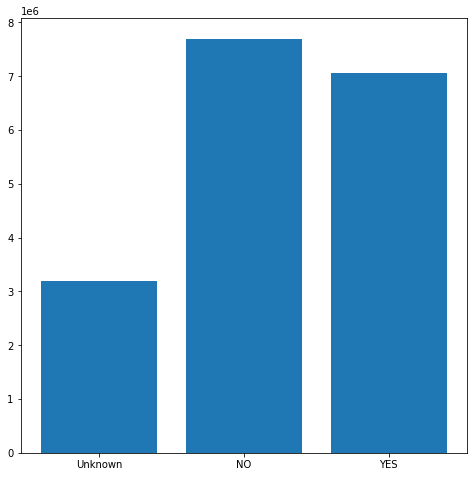

In [25]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.bar(x = df['waterfront'], height = df['price']);

In [34]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

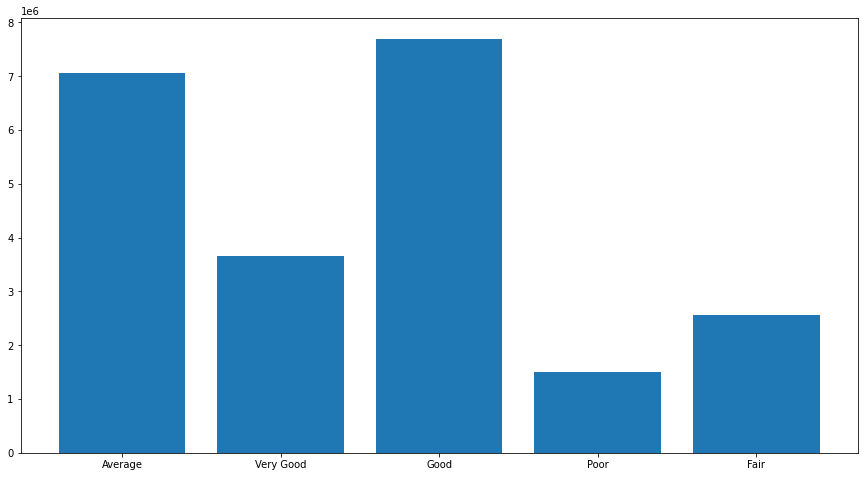

In [26]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(x = df['condition'], height = df['price']);

In [35]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

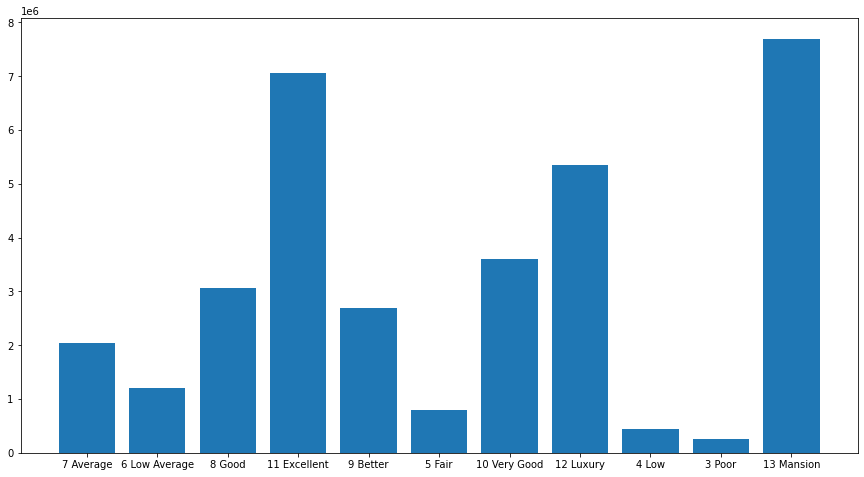

In [27]:
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(x = df['grade'], height = df['price']);

- There does not seem to be that much of a difference in price between No and Yes for waterfront location. 
- There does seems to be an increase in price as the condition increases from 'Poor', but the houses in 'Good' and 'Average' condition have higher sale prices than houses in 'Very Good' condition. 
- The strongest relationship seems to be between price and grade, as price increases from '3 Poor' to '13 Mansion' (though '11 Excellent has higher sale prices than '12 Luxury'



In [48]:
y = df['price']
x_grade = pd.DataFrame(df.loc[:, 'grade'])


In [50]:
# chose to drop 'grade_4 Low' because there was only 1 'Poor' condition house
# I believe that this will allow for better reference for house price
X = X.drop(columns = ['grade_4 Low'])
X

,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,0,0,0,0,0,1,0


In [51]:
results_grade = sm.OLS(y, sm.add_constant(X)).fit()

In [52]:
results_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2338.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:39:20   Log-Likelihood:            -2.9947e+05
No. Observations:               21597   AIC:                         5.990e+05
Df Residuals:                   21586   BIC:                         5.990e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 2.12e+05    4.9e+04      4.327      0.000    1.16e+05    3.08e+05
grade_10 Very Good   8.603e+05   4.96e+04     17.354      0.000    7.63e+05    9.58e+05
grade_11 Excellent   1.286e+06   5.06e+04     25.398      0.000    1.19e+06    1.39e+06
grade_12 Luxury      1.991e+06   5.59e+04     35.586      0.000    1.88e+06     2.1e+06
grade_13 Mansion     3.499e+06   8.59e+04     40.710      0.000    3.33e+06    3.67e+06
grade_3 Poor             5e+04   2.59e+05      0.193      0.847   -4.58e+05    5.58e+05
grade_5 Fair         3.652e+04   5.17e+04      0.707      0.480   -6.47e+04    1.38e+05
grade_6 Low Average  8.991e+04   4.93e+04      1.823      0.068   -6753.343    1.87e+05
grade_7 Average      1.906e+05   4.91e+04      3.884      0.000    9.44e+04    2.87e+05
grade_8 Good          3.31e+05   4.91e+04      6.740      0.000    2.35e+05    4.27e+05
grade_9 Better       5.617e+05   4.92e+04     11.406      0.000    4.65e+05    6.58e+05
==============================================================================
Omnibus:                    15768.954   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           792638.204
Skew:                           2.994   Prob(JB):                         0.00
Kurtosis:                      32.068   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model exploring condition and sale price can account for 52% of variance in price. (this is only a 3% increase from just square feet living model.

Statistically signigicant coefficients include grades '7 Average' through '13 Mansion'.
- When compared to a house with a Low Build condition a: 
  - 'Average' house sold for 190K more dollars. 
  - 'Good' house sold for 331K more dollars.
  - 'Better' house sold for 561K more dollars.
  - 'Very good' house sold for 860K more dollars.
  - 'Excellent' house sold for 1.2 million more dollars.
  - 'Luxary' house sold for 1.9 million more dollars.
  - 'Mansion' house sold for 3.5 million more dollars.


## Multiple Linear Regression

### Exploring Multicollinearity

In [22]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_calc
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [24]:
df_multico = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_multico['pairs'] = list(zip(df_multico.level_0, df_multico.level_1))

df_multico.set_index(['pairs'], inplace = True)

df_multico.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_multico.columns = ['cc']

df_multico.drop_duplicates(inplace=True)

df_multico[(df_multico.cc>.75) & (df_multico.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758


These columns are all highly correlated with one another and could potentially be dropped from future models. 